# POSTTEST 4 KECERDASAN BUATAN 

<ul>
    <li>Nama : denissa putri maha rani <br>
    <li>NIM : 2009106079
</ul>

dataset : <a href="https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction"> **Heart Failure Prediction**

<ul>
    library yg digunakan :
    <li> pandas         ==> 1.5.0
    <li> numpy          ==> 1.23.3
    <li> seaborn        ==> 0.12.0
    <li> matplotlib     ==> 3.5.3
    <li> scikit-learn   ==> 1.1.2
</ul>

# Data preprocessing

<ol>
<li> Data Split <br>
    membagi dataset menjadi beberapa bagian yaitu training set, validation set, dan testing set <br><br>
<li> Data Transformation <br>
    merubah skala data ke dalam bentuk lain sehingga memiliki distribusi yang diharapkan
    <ul>
        <li> normalisasi <br>
        <li> standarisasi <br><br>
    </ul>
<li> Data Cleaning <br>
    <ul>
        <li> menangani nilai null<br>
        <li> menangani format yang salah <br>
        <li> menangani nilai duplikat <br><br>
    </ul>
<li> Encoding <br>
    <ul>
        <li> ordinal encoding <br>
        <li> one hot encoding <br><br>
    </ul>
</ol>

### **1. Data Splitting**
Data dibagi menjadi data train dan data testing dengan proporsi data training dan data testing sebesar 70:30.

In [1]:
#import library yg digunakan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
# membaca file dataset bertipe csv
dataset_Heart = pd.read_csv("heart.csv")
dataset_Heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0,Normal,156.0,NaN,1.0,Flat,1
2,NaN,M,ATA,NaN,283.0,0,ST,98.0,NaN,0.0,Up,0
3,NaN,F,ASY,NaN,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,NaN,M,NAP,NaN,195.0,0,NaN,NaN,N,0.0,Up,0


In [5]:
# Menampilkan panjang dataset
print(f'panjang dari dataset heart.csv : {len(dataset_Heart)} baris')

panjang dari dataset heart.csv : 918 baris


In [7]:
dataset_x = dataset_Heart[['Age', 'Sex', 'ChestPainType', 'RestingBP','Cholesterol','FastingBS','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']]
label_y = dataset_Heart['RestingECG']

In [8]:
# split dataset dengan perbandingan 30% untuk data testing
x_train, x_test, y_train, y_test = train_test_split(dataset_x, label_y, test_size=.3)

In [9]:
print(f'panjang data train    : {len(x_train)} baris',
      f'panjang label train   : {len(y_train)} baris',
      f'panjang data testing  : {len(x_test)} baris',
      f'panjang label testing : {len(y_test)} baris',
      f'panjang total dataset : {len(dataset_Heart)} baris',
      sep='\n'
     )

panjang data train    : 642 baris
panjang label train   : 642 baris
panjang data testing  : 276 baris
panjang label testing : 276 baris
panjang total dataset : 918 baris


## **2. Data Transformation**
Merubah skala data ke dalam bentuk lain sehingga distribusi sesuai dengan yang diharapkan. 2 jenis tranformation :
    <ul>
        <li> normalisasi <br>
        <li> standarisasi <br><br>
    </ul>


### A. Normalisasi

In [11]:
# import library yang akan digunakan
from sklearn.preprocessing import StandardScaler    # standarisasi
from sklearn.preprocessing import MinMaxScaler      # normalisasi
import matplotlib.pyplot as plt                     # visualisasi
import seaborn as sns  

In [12]:
dataset_Heart.dtypes

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [13]:
# buat dataframe untuk normalisasi dataset
dataHeart_norm = dataset_Heart.copy()

#tools 
min_max_scaler = MinMaxScaler()

#proses normalisasi
normalisasi_dataHeart= min_max_scaler.fit_transform(dataHeart_norm[['Age', 'RestingBP', 'Cholesterol','FastingBS','MaxHR', 'Oldpeak','HeartDisease']])

#format ulang dataset menjadi dataframe
normalisasi_dataHeart = pd.DataFrame(normalisasi_dataHeart)

#kembalikan nama atribut
normalisasi_dataHeart.rename(columns={0:'Age',1:'RestingBP',2:'Cholesterol',3:'FastingBS', 4:'MaxHR',5:'Oldpeak',6:'HeartDisease'}, inplace=True)



In [17]:
hasil_transformasi = pd.DataFrame(normalisasi_dataHeart)

In [19]:
hasil_transformasi

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0
2,NaN,NaN,0.469320,0.0,0.267606,0.295455,0.0
3,NaN,NaN,0.354892,0.0,0.338028,0.465909,1.0
4,NaN,NaN,0.323383,0.0,NaN,0.295455,0.0
...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,1.0
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1.0
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1.0
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,1.0


#### Visualisasi dataset sebelum dan sesudah normalisasi

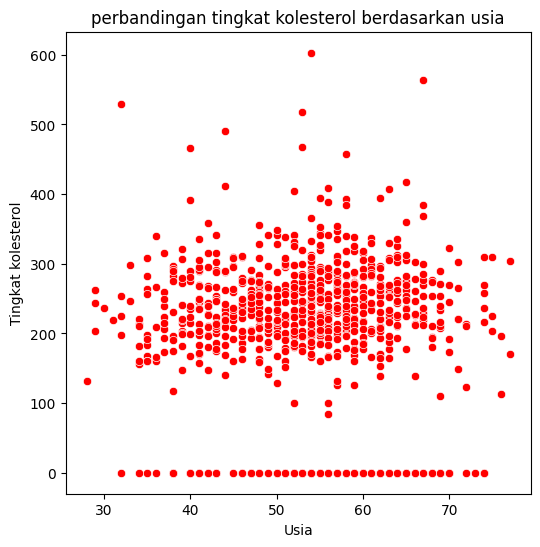

In [15]:
#visualisasi dataset sebelum di normalisasi
plt.figure(1, figsize=(6,6))
sns.scatterplot(dataHeart_norm, x='Age', y='Cholesterol', color='red')
plt.title('perbandingan tingkat kolesterol berdasarkan usia')
plt.xlabel('Usia')
plt.ylabel('Tingkat kolesterol')

plt.show()

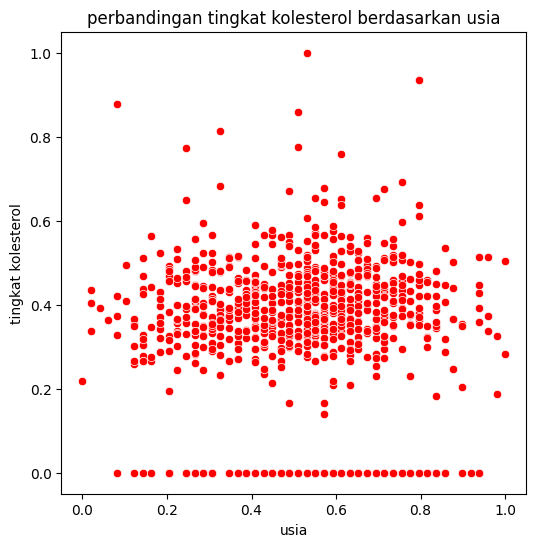

In [16]:
# visualisasi dataset setelah di normalisasi
plt.figure(1, figsize=(6,6))
sns.scatterplot(normalisasi_dataHeart, x='Age', y='Cholesterol', color='red')
plt.title('perbandingan tingkat kolesterol berdasarkan usia')
plt.xlabel('usia')
plt.ylabel('tingkat kolesterol')

plt.show()

### B. Standarisasi

proses penskalaan data sehingga memiliki nilai
rata-rata 0 dan standar deviasi 1

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# menampilkan standar deviasi setiap atribut dataset
np.std(dataset_Heart)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Age               9.382834
RestingBP        18.525199
Cholesterol     109.452940
FastingBS         0.423501
MaxHR            25.473402
Oldpeak           1.066384
HeartDisease      0.497143
dtype: float64

In [30]:
# membuat data frame baru untuk menjaga keamanan dataframe yg asli
dataHeart_std = dataset_Heart.copy()

# tools 
scaler = StandardScaler()

# proses standarisasi
dataHeart_standarisasi = scaler.fit_transform(dataset_Heart[['Age', 'RestingBP', 'Cholesterol','FastingBS','MaxHR', 'Oldpeak','HeartDisease']])

In [31]:
hasil_standarisasi = pd.DataFrame(dataHeart_standarisasi)

In [33]:
hasil_standarisasi

,0,1,2,3,4,5,6
0,-1.448614,0.411823,0.823668,-0.553021,1.382057,-0.831102,-1.113115
1,-0.489416,1.491434,-0.172194,-0.553021,0.753951,0.106646,0.898380
2,NaN,NaN,0.768850,-0.553021,-1.522934,-0.831102,-1.113115
3,NaN,NaN,0.138442,-0.553021,-1.130368,0.575520,0.898380
4,NaN,NaN,-0.035149,-0.553021,NaN,-0.831102,-1.113115
...,...,...,...,...,...,...,...
913,-0.915726,-1.207593,0.595259,-0.553021,-0.188208,0.294196,0.898380
914,1.535559,0.627745,-0.053422,1.808250,0.165101,2.357242,0.898380
915,0.363205,-0.127982,-0.619875,-0.553021,-0.855571,0.294196,0.898380
916,0.363205,-0.127982,0.339441,-0.553021,1.460570,-0.831102,0.898380


#### Dataset sebelum dan sesudah standarisasi

In [37]:
print('Dataset sebelum standarisasi :',  
      dataset_Heart.drop('RestingECG', axis=1).head(),
      f'Nilai standar deviasi:\n{np.std(dataset_Heart)}',
      sep='\n', end='\n\n')

print('Dataset setelah standarisasi:',  
      hasil_standarisasi[:5],
      f'Nilai standar deviasi: {np.std(hasil_standarisasi)}',
      sep='\n')

Dataset sebelum standarisasi :
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS  MaxHR  \
0  40.0   M           ATA      140.0        289.0          0  172.0   
1  49.0   F           NAP      160.0        180.0          0  156.0   
2   NaN   M           ATA        NaN        283.0          0   98.0   
3   NaN   F           ASY        NaN        214.0          0  108.0   
4   NaN   M           NAP        NaN        195.0          0    NaN   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1            NaN      1.0     Flat             1  
2            NaN      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Nilai standar deviasi:
Age               9.382834
RestingBP        18.525199
Cholesterol     109.452940
FastingBS         0.423501
MaxHR            25.473402
Oldpeak           1.066384
HeartDisease      0.497143
dtype: float64

Dataset 

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


## **Data Cleaning**
kesalah dalam data yaitu :
<ul>
    <li>Terdapat nilai NULL <br>
    <li>Format data yang salah <br>
    <li>Terdapat duplikat <br>
</ul>


In [43]:
# import library yg akan digunakan
from sklearn.impute import SimpleImputer

###  a. Data dengan nilai NULL

In [44]:
dataset_Heart.isna().sum()

Age               6
Sex               0
ChestPainType     0
RestingBP         4
Cholesterol       2
FastingBS         0
RestingECG        3
MaxHR             4
ExerciseAngina    2
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [45]:
# copy dataset 
data_Heart_baru = dataset_Heart.copy()

In [61]:
dataset_Heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             912 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       914 non-null    float64
 4   Cholesterol     916 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      915 non-null    object 
 7   MaxHR           914 non-null    float64
 8   ExerciseAngina  916 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


untuk data yg < 918 berarti memiliki nilai NULL

In [62]:
# tools
imputer_mean   = SimpleImputer(strategy='mean')           
imputer_median = SimpleImputer(strategy='median')       
imputer_modus  = SimpleImputer(strategy='most_frequent') 

In [63]:
# mengubah nilai null dengan nilai mean
data_Heart_baru['RestingBP']   = imputer_mean.fit_transform(data_Heart_baru[['RestingBP']])
data_Heart_baru['Cholesterol'] = imputer_mean.fit_transform(data_Heart_baru[['Cholesterol']])

# mengubah nilai null dengan nilai median
data_Heart_baru['Age']   = imputer_median.fit_transform(data_Heart_baru[['Age']])
data_Heart_baru['MaxHR'] = imputer_median.fit_transform(data_Heart_baru[['MaxHR']])


In [64]:
# mengubah nilai null dengan nilai modus/yang paling banyak muncul
data_Heart_baru['RestingECG']     = imputer_modus.fit_transform(data_Heart_baru[['RestingECG']])
data_Heart_baru['ExerciseAngina'] = imputer_modus.fit_transform(data_Heart_baru[['ExerciseAngina']])

In [65]:
# cek kembali data NULL
data_Heart_baru.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

dataset sudah tidak mengandung nilai NULL

### b. Nilai Duplikat

In [49]:
# copy dataset heart ke dataframe baru
dataHeart_duplikat = dataset_Heart.copy()

# cek nilai duplikat
dataHeart_duplikat.duplicated().sum()


1

ada 1 nilai duplikat pada dataset heart.csv

In [50]:
# Hapus baris yang nilainya sama/terduplikat
dataHeart_duplikat.drop_duplicates(inplace=True)

# cek kembali nilai duplikat
dataHeart_duplikat.duplicated().sum()

0

dataset sudah tidak memiliki nilai duplikat

### C. Mengganti format tipe data

In [68]:
data_Heart_baru.dtypes

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [71]:
# atribut dataset tidak bisa diubah formatnya jika berisi nilai NULL jadi menggunakan dataset yang sudah dihilangkan nilai NULL nya
data_Heart_baru.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [72]:
# mengubah tipe data float64 menjadi int64 pada atribut Age
data_Heart_baru['Age'].astype('int64').dtypes

dtype('int64')

### One Hot Encoding
salah satu metode encoding yang merepresentasikan data bertipe kategori sebagai vektor biner yang bernilai integer, 0 dan 1, dimana semua elemen akan bernilai 0 kecuali satu elemen yang bernilai 1, yaitu elemen yang memiliki nilai kategori tersebut.

In [73]:
# import tools 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [74]:
# membuat dataframe baru
dataHeart_onehotEnco = data_Heart_baru.copy()

In [76]:
dataHeart_onehotEnco.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.000000,289.0,0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.000000,180.0,0,Normal,156.0,N,1.0,Flat,1
2,54.0,M,ATA,132.370897,283.0,0,ST,98.0,N,0.0,Up,0
3,54.0,F,ASY,132.370897,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,132.370897,195.0,0,Normal,138.0,N,0.0,Up,0
5,54.0,M,NAP,132.370897,339.0,0,Normal,138.0,N,0.0,Up,0
6,54.0,F,ATA,130.000000,237.0,0,Normal,138.0,N,0.0,Up,0
7,54.0,M,ATA,110.000000,208.0,0,Normal,138.0,N,0.0,Up,0
8,37.0,M,ASY,140.000000,207.0,0,Normal,130.0,Y,1.5,Flat,1
9,48.0,F,ATA,120.000000,284.0,0,Normal,120.0,N,0.0,Up,0


In [77]:
# membuat dataframe baru
dataHeart_onehotEnco2 = dataHeart_onehotEnco.copy()

# encoding label atribut menjadi biner
temp_datasetHeart = pd.get_dummies(dataHeart_onehotEnco2[['RestingECG']])

# format kembali dataset ke dataFrame
temp_datasetHeart = pd.DataFrame(temp_datasetHeart)

# hilangkan label atribut sebelumnya
dataHeart_onehotEnco2.drop('RestingECG', axis=1, inplace=True)

# tambahkan label atribut baru
dataHeart_onehotEnco2 = dataHeart_onehotEnco2.join(temp_datasetHeart)

# tampilkan nilai/record dataset
dataHeart_onehotEnco2.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40.0,M,ATA,140.000000,289.0,0,172.0,N,0.0,Up,0,0,1,0
1,49.0,F,NAP,160.000000,180.0,0,156.0,N,1.0,Flat,1,0,1,0
2,54.0,M,ATA,132.370897,283.0,0,98.0,N,0.0,Up,0,0,0,1
3,54.0,F,ASY,132.370897,214.0,0,108.0,Y,1.5,Flat,1,0,1,0
4,54.0,M,NAP,132.370897,195.0,0,138.0,N,0.0,Up,0,0,1,0
5,54.0,M,NAP,132.370897,339.0,0,138.0,N,0.0,Up,0,0,1,0
6,54.0,F,ATA,130.000000,237.0,0,138.0,N,0.0,Up,0,0,1,0
7,54.0,M,ATA,110.000000,208.0,0,138.0,N,0.0,Up,0,0,1,0
8,37.0,M,ASY,140.000000,207.0,0,130.0,Y,1.5,Flat,1,0,1,0
9,48.0,F,ATA,120.000000,284.0,0,120.0,N,0.0,Up,0,0,1,0
